In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import numpy as np

folder_path = 'animals/Teste'
image_size = (128, 128)
altura = 128
largura = 128

def load_images_from_folder(folder_path, image_size):
    images = []
    labels = []

    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):  # Filtrar por extensão de arquivo desejada
                image_path = os.path.join(root, file)
                label = os.path.basename(root)  # Usar o nome da pasta como rótulo

                image = Image.open(image_path)
                image = image.resize(image_size)
                image = image.convert('RGB')

                images.append(np.array(image))
                labels.append(label)

    return images, labels

images_test, labels_test = load_images_from_folder(folder_path, image_size)
print(len(images_test))

449


In [3]:
folder_path = 'animals/Train'
images_train, labels_train = load_images_from_folder(folder_path, image_size)
print(len(images_train))
folder_path = 'animals/Validação'
images_validation, labels_validation = load_images_from_folder(folder_path, image_size)
print(len(images_validation))

2100
451


241


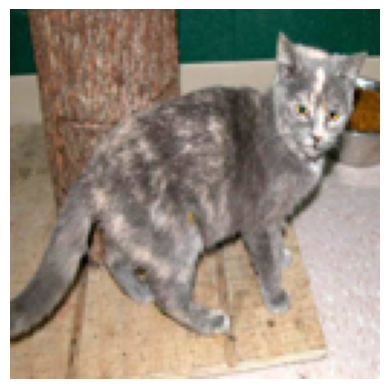

In [4]:
#Printando uma imagem aleatoria do meu conjunto de imagens
random_index = np.random.randint(0, len(images_train))

# Obter a imagem correspondente e a etiqueta
indice_aleatorio = random_index
random_image = images_train[indice_aleatorio]
random_label = labels_train[indice_aleatorio]
print(indice_aleatorio)


# Exibir a imagem usando matplotlib
plt.imshow(random_image)
plt.axis('off')  # Não mostrar eixos
plt.show()

In [5]:
#codificação dos rótulos
from tensorflow.keras.utils import to_categorical

class_labels = ['dog', 'cat', 'panda'] #definindo as classes
class_to_num = {'dog': 0, 'cat': 1, 'panda': 2} #colocando numeros para as respectivas classes
numeric_labels = [class_to_num[label] for label in class_labels] #convertendo rotulos textuais em numeros
encoded_labels = to_categorical(numeric_labels) #one-hot encoding
print(encoded_labels)
#dog = [1, 0, 0]
#cat = [0, 1, 0]
#panda = [0, 0, 1]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [6]:
x_train, y_train = images_train, labels_train
x_test, y_test = images_test, labels_test
x_validation, y_validation = images_validation, labels_validation

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_images = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_images = ImageDataGenerator(rescale = 1./255)

In [9]:
# Pré-processamento das imagens de treino e validação
training_set = train_images.flow_from_directory('animals/Train/',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

validation_set = validation_images.flow_from_directory('animals/Validação',
                                                        target_size = (64, 64),
                                                        batch_size = 16,
                                                        class_mode = 'categorical')

Found 2100 images belonging to 3 classes.
Found 451 images belonging to 3 classes.


In [10]:
classifier.fit(training_set,
                         steps_per_epoch = 131,
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = 1000)

Epoch 1/10
131/131 [==============================] - 24s 170ms/step - loss: 0.8925 - accuracy: 0.5115 - val_loss: 0.6750 - val_accuracy: 0.6674
Epoch 2/10
131/131 [==============================] - 16s 119ms/step - loss: 0.7103 - accuracy: 0.6401
Epoch 3/10
131/131 [==============================] - 16s 119ms/step - loss: 0.6492 - accuracy: 0.6852
Epoch 4/10
131/131 [==============================] - 15s 117ms/step - loss: 0.6137 - accuracy: 0.7044
Epoch 5/10
131/131 [==============================] - 15s 115ms/step - loss: 0.5863 - accuracy: 0.7207
Epoch 6/10
131/131 [==============================] - 15s 115ms/step - loss: 0.5463 - accuracy: 0.7476
Epoch 7/10
131/131 [==============================] - 15s 114ms/step - loss: 0.5384 - accuracy: 0.7404
Epoch 8/10
131/131 [==============================] - 15s 115ms/step - loss: 0.5289 - accuracy: 0.7495
Epoch 9/10
131/131 [==============================] - 23s 179ms/step - loss: 0.5021 - accuracy: 0.7625
Epoch 10/10
131/131 [==========

1/1 [==============================] - 0s 32ms/step
Classe real: Cats_Test
Classe prevista: cat


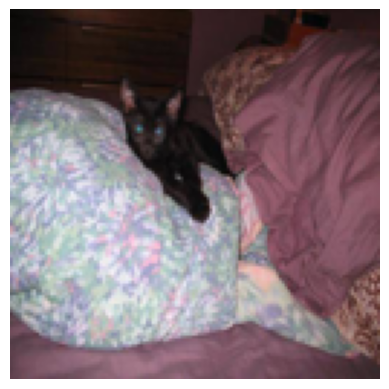

In [25]:
from keras.preprocessing import image
import cv2
import random

random_index = np.random.randint(0, len(images_test))

# Obter a imagem correspondente e a etiqueta
indice_aleatorio = random_index
random_image = images_test[indice_aleatorio]
random_label = labels_test[indice_aleatorio]

size = (64, 64)
image_test = random_image
image_test = cv2.resize(image_test, size)

test_image = image.img_to_array(image_test)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
predicted_class = np.argmax(result, axis=1)

print("Classe real:", random_label)
print("Classe prevista:", class_labels[predicted_class[0]])

plt.imshow(random_image)
plt.axis('off')  # Não mostrar eixos
plt.show()